# Лабораторная работа №2
## по предмету "оптимальное управление"
```
Выполнил: студент гр. А-14м-16 Мигаль И.А
Проверил: Зубков Павел Валерьевич
```

[Описание лабораторной работы](http://localhost:8888/tree/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/Opisanie_laboratornoi_774_raboty__2.pdf)

In [1]:
import sys
sys.path.insert(0, 'C:\\Users\\elextom\\OneDrive\\Documents\\A-14m-16\\2CURSE3SEM\\optimal_control\\opt_ctrl_lab_2\\lab_2\\')
sys.path.insert(0, 'C:\\Users\\ivanm\\OneDrive\\Documents\\A-14m-16\\2CURSE3SEM\\optimal_control\\opt_ctrl_lab_2\\lab_2\\')
#print(sys.path)

In [2]:
print(__doc__)

# Author: Ivan Migal ivan.migal@mail.ru
# License: BSD 3 clause

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib import colors as mcolors
import utils

from utils import array
from utils import TDMA

colors = list(mcolors.BASE_COLORS)
colors += list(mcolors.CSS4_COLORS.keys())

Automatically created module for IPython interactive environment


In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 12
plt.style.use('ggplot')
# Настройка шрифта
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

---
# Исходные данные

In [4]:
# Решение тестового примера
def x(s, t):
    #return ((t + 1.) * (s - 1.)) ** 2
    #return t ** 2 * (s - 1.) ** 2
    return (s ** 2 - 1. * s) ** 2
    #return (s - 1) ** 2
    #return 0.
    
# Плотность внешних сил
def f(s, t):
    #return 2. * (s - 1.) ** 2 - 2. * 1 ** 2 * (t + 1.) ** 2
    #return -2. * 1 ** 2 * t ** 2 + 2. * (s - 1.) ** 2
    return -1. * (12. * s ** 2 - 12. * s + 2.) * 1. ** 2
    #return -2. * 1. ** 2
    #return 0.
    
# Внешняя сила, действующая на левый конец
def p(t):
    #return -2. * (t + 1.) ** 2
    #return -2. * t ** 2
    return 0.
    #return -2. 
    #return 0.
    
# Положение струны в начальный момент времени
def fi_0(s):
    #return (s - 1.) ** 2
    #return 0.
    return (s ** 2 - 1. * s) ** 2
    #return (s - 1) ** 2  
    #return 0.
    
# Вторая производная по s положение струны в начальный момент времени
def d2fi_0(s):
    #return  2.
    #return 0.
    return 1. * (12. * s ** 2 - 12. * s + 2.)
    #return 2. * 1. ** 2
    #return 0.
    
# скорость струны в начальный момент времени
def fi_1(s):
    #return 2. * (s - 1.) ** 2
    #return 0
    return 0.
    #return 0.
    #return 0.
    
# Желаемое распределение температуры
def y(s):
    #return (s ** 2 - 1. * s) ** 2
    #return s ** 2
    return s

In [5]:
# Словарь параметров
p_d = {}

# Заданные положительные величины
p_d['a'], p_d['l'], p_d['T'] = 1., 1., 1.

p_d['p(t)'] = p

p_d['f(s, t)'] = f

# Заданные числа
p_d['R_0'], p_d['R_1'] = 10., 10.

p_d['fi_0(s)'], p_d['fi_1(s)'], p_d['d2fi_0(s)'] = fi_0, fi_1, d2fi_0

p_d['y(s)'] = y

# Значение веса в схеме
p_d['sigma'] = 1. / 2.1

p_d['N'] = 40

# Число точек на пространственной и временной сетке соответственно
if p_d['sigma'] <= 1. / 4.:  
    p_d['M'] = max(math.ceil(p_d['T'] / p_d['l'] * p_d['a'] * (1 - 4. * p_d['sigma']) ** .5 * p_d['N']),
                   math.ceil(p_d['N'] * p_d['a'] * p_d['T'] / p_d['l']))
elif p_d['sigma'] == 0.:
    p_d['M'] = math.ceil(p_d['N'] * p_d['a'] * p_d['T'] / p_d['l'])
else:
    p_d['M'] = 40

# Шаг на пространственной и временной сетке соответственно
p_d['dh'], p_d['dt'] = p_d['l'] / p_d['N'], p_d['T'] / p_d['M']
p_d['l'], p_d['T'], p_d['dh'], p_d['dt']

(1.0, 1.0, 0.025, 0.025)

---
# Создание модели и управление

In [6]:
model = utils.Lab2OptCtrlModel(p_d)

In [7]:
criterion = utils.criterion_3
get_alpha = utils.get_alpha_2

In [8]:
%%time
model.solve(criterion, get_alpha, eps=10**-8)

10000000.0
0.116327066105
0.00987325143328
0.0630276776897
0.0253709907531
0.001784607963
0.012444481142
0.00227921943854
0.0114698012529
0.00215297698808
0.00474552184569
6.94922860774e-05
0.00570362280617
0.00120468707695
0.00239651949213
5.42799107961e-05
0.00234265612239
0.00100887397545
0.00184861689234
1.80315588226e-05
0.00102605421529
0.000112990972494
0.0015379468152
0.000104022789977
0.00136162378977
0.000144021303431
0.00104628295513
0.000342566568304
0.000139203543033
0.000467247927226
0.00010894667799
0.000828897960429
0.000136264392255
0.000435126270815
3.23608997156e-05
0.00181358322199
0.000540604011021
1.35232364803e-06
0.00191256111045
0.000627831097323
2.68619395533e-05
0.000657338098183
3.28427903476e-05
0.000404130437485
0.000111263434429
4.45309456073e-05
0.000412375749952
0.000114027032551
5.63906161574e-05
0.000226965583557
2.98189761509e-05
0.0003353946058
4.60634151455e-05
0.000227659450387
6.85237606488e-05
0.000100496532029
6.11206637683e-05
0.00025250130591

2.24645601795e-05
5.37886878292e-06
2.25635109273e-05
5.39040810347e-06
2.26483924172e-05
5.40580483699e-06
2.27439348975e-05
5.41716251225e-06
2.28290372126e-05
5.43134882521e-06
2.29220866621e-05
5.44230040032e-06
2.30067947968e-05
5.45549109906e-06
2.30978924143e-05
5.46591163029e-06
2.31818513665e-05
5.47824895708e-06
2.32713501849e-05
5.48806287893e-06
2.33543340394e-05
5.49965286422e-06
2.34424941722e-05
5.50880714256e-06
2.35243353951e-05
5.51974045435e-06
2.36113792583e-05
5.52818784288e-06
2.36919239104e-05
5.53855438797e-06
2.37780756915e-05
5.5462399358e-06
2.3857146422e-05
5.5561426438e-06
2.39426703078e-05
5.56298874844e-06
2.40200243224e-05
5.57256112156e-06
2.41052742428e-05
5.57844615304e-06
2.4180542187e-05
5.58787952775e-06
2.42660401069e-05
5.59260241202e-06
2.43386238513e-05
5.60219305715e-06
2.44251960107e-05
5.60540997547e-06
2.44940849443e-05
5.61564537669e-06
2.45831127556e-05
5.61675117217e-06
2.4646538076e-05
5.62847462254e-06
2.47404387377e-05
5.62637248698e-

3.76647673971e-06
2.62151137688e-06
3.79882065469e-06
2.63242936743e-06
3.83081660415e-06
2.64312879981e-06
3.86247470993e-06
2.65361515561e-06
3.89380460871e-06
2.66389365626e-06
3.92481544669e-06
2.67396928424e-06
3.95551593801e-06
2.6838467926e-06
3.98591437237e-06
2.69353073682e-06
4.01601867739e-06
2.70302546692e-06
4.04583639976e-06
2.71233515734e-06
4.07537477239e-06
2.7214638102e-06
4.10464070805e-06
2.73041526713e-06
4.13364082223e-06
2.73919321798e-06
4.16238146036e-06
2.74780121286e-06
4.19086870648e-06
2.75624266536e-06
4.21910840041e-06
2.7645208669e-06
4.24710615593e-06
2.77263898755e-06
4.27486736891e-06
2.78060008711e-06
4.30239723032e-06
2.78840711376e-06
4.32970073456e-06
2.79606291925e-06
4.35678269103e-06
2.80357025832e-06
4.38364774843e-06
2.81093179661e-06
4.41030037828e-06
2.81815010976e-06
4.43674489859e-06
2.82522769298e-06
4.46298548213e-06
2.83216696727e-06
4.48902616225e-06
2.83897027167e-06
4.51487082641e-06
2.84563987924e-06
4.5405232501e-06
2.85217799644e

2.61403801439e-06
6.55490243543e-07
2.69294245192e-06
6.40487780811e-07
2.65886530728e-06
6.53114409871e-07
2.69620627156e-06
6.47804450038e-07
2.68719450602e-06
6.54233834794e-07
2.70864601057e-06
6.52729442946e-07
2.70953150084e-06
6.56590650091e-07
2.7244086274e-06
6.56665723207e-07
2.72945040957e-06
6.59369137857e-07
2.74138779235e-06
6.60126715815e-07
2.748266407e-06
6.62258539253e-07
2.75877888417e-06
6.63314597063e-07
2.7664976566e-06
6.65134309537e-07
2.77625695327e-06
6.66314833586e-07
2.78436217018e-06
6.6794443059e-07
2.79368424632e-06
6.69166366988e-07
2.801958009e-06
6.70666682401e-07
2.81100016183e-06
6.71888510296e-07
2.81933255801e-06
6.73291717323e-07
2.82817758167e-06
6.74491831707e-07
2.83651062037e-06
6.75816007957e-07
2.84520459354e-06
6.76982800849e-07
2.85350643723e-06
6.78238770931e-07
2.86207653079e-06
6.79365855033e-07
2.87032903993e-06
6.80560562997e-07
2.87879230241e-06
6.81644361463e-07
2.88698474001e-06
6.82782612001e-07
2.89535265739e-06
6.83821092574e-07

1.419873561e-06
3.38095166813e-07
1.42400646637e-06
3.38688557795e-07
1.42812030658e-06
3.39269500104e-07
1.43221456469e-06
3.39838348378e-07
1.43629004011e-06
3.40395018116e-07
1.44034635773e-06
3.4093981424e-07
1.44438418497e-06
3.41472682519e-07
1.44840322948e-06
3.41993902857e-07
1.45240410087e-06
3.42503432744e-07
1.45638653983e-06
3.43001541208e-07
1.46035113353e-06
3.43488185323e-07
1.46429762043e-06
3.439636306e-07
1.46822658823e-06
3.44427829984e-07
1.47213776098e-06
3.44881046908e-07
1.47603172541e-06
3.45323233823e-07
1.479908215e-06
3.4575465067e-07
1.48376780311e-06
3.4617523604e-07
1.48761018743e-06
5.70512456816e-07
2.95997164604e-07
1.3509095361e-06
4.77486266703e-07
9.49926702018e-07
3.37202452009e-08
9.34018425238e-06
4.32855722442e-06
1.90996501998e-06
1.54642999691e-07
2.05332884895e-06
6.31143269275e-08
5.66944187053e-06
7.36712490606e-07
4.31412210573e-07
6.83809276226e-07
4.08965896774e-07
6.65363378712e-07
4.0120926259e-07
6.59611277091e-07
3.99774520264e-07
6.5

3.57356860516e-07
2.24088751151e-07
3.59493182685e-07
2.25821074643e-07
3.61609311991e-07
2.27532842501e-07
3.63705761583e-07
2.29224533525e-07
3.65783012557e-07
2.30896606379e-07
3.67841533079e-07
2.32549498838e-07
3.69881766397e-07
2.34183631462e-07
3.71904140304e-07
2.35799404532e-07
3.73909055796e-07
2.37397203486e-07
3.75896908017e-07
2.38977399754e-07
3.77868070699e-07
2.40540348448e-07
3.7982290549e-07
2.4208639341e-07
3.81761759002e-07
2.43615863827e-07
3.83684967667e-07
2.45129076931e-07
3.85592846637e-07
2.466263393e-07
3.8748571473e-07
2.48107949008e-07
3.89363868219e-07
2.49574186767e-07
3.91227590571e-07
2.51025329657e-07
3.93077166895e-07
2.52461645796e-07
3.94912865172e-07
2.53883390723e-07
3.96734945818e-07
2.55290815392e-07
3.98543661521e-07
2.56684160957e-07
4.00339258689e-07
2.5806365956e-07
4.02121969551e-07
2.59429539377e-07
4.03892028758e-07
2.60782019423e-07
4.05649652347e-07
2.62121310093e-07
4.07395059994e-07
2.63447623201e-07
4.09128461556e-07
2.64761156253e-0

In [9]:
model.final_step

2486

---
# Процесс управления

In [10]:
X_ = np.arange(0., p_d['l'] + p_d['dh'], p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'], p_d['dt'])

In [11]:
y_s = model.y_arr
bounds = [min(y_s), max(y_s)]

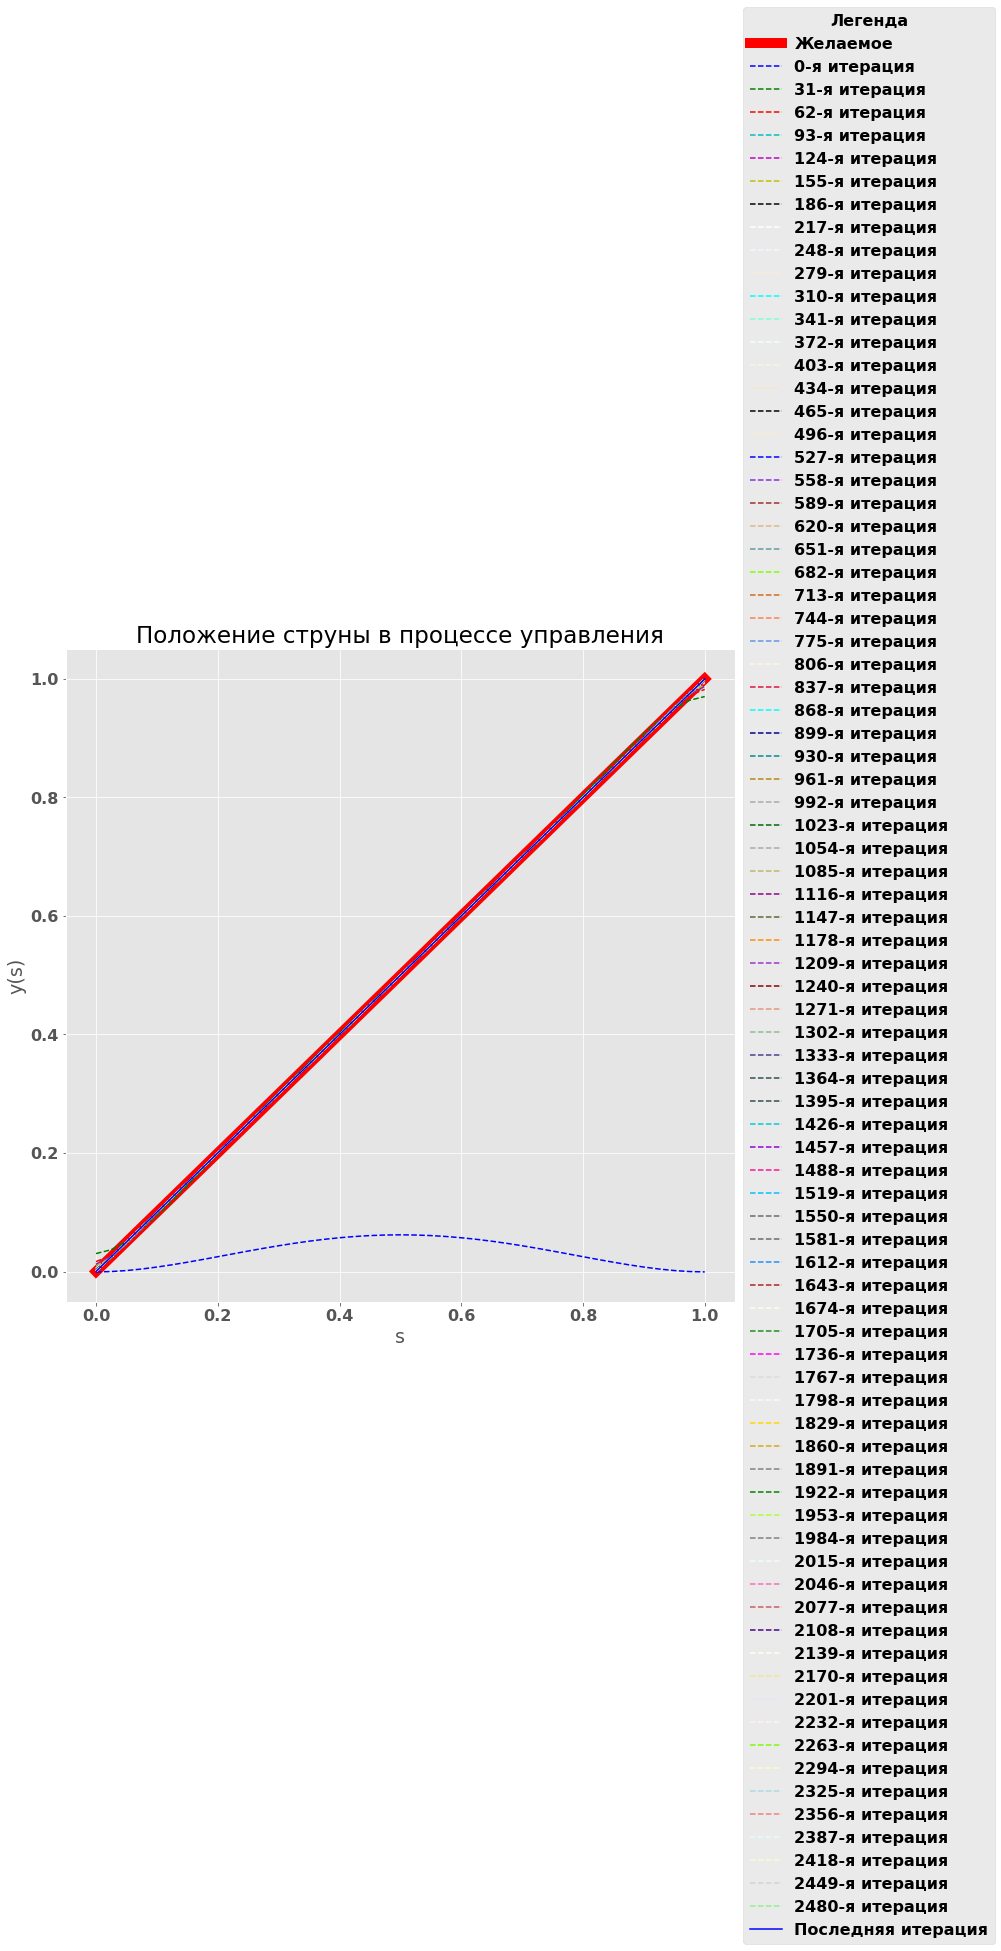

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', linewidth=10., label='Желаемое')
part = 1
count = 80
step = int(model.final_step / count / part)
if step != 0:
    for i in range(0, int(model.final_step / part), step):
        ax.plot(X_, model.x_arr[i][-1,:], color=colors[int(i / step)], linestyle='--', label='{}-я итерация'.format(i))
    ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
    plt.xlabel('s')
    plt.ylabel('y(s)')
    plt.title('Положение струны в процессе управления')
    plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
else:
    ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
    plt.xlabel('s')
    plt.ylabel('y(s)')
    plt.title('Положение струны в процессе управления')
    plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Желаемое и полученное положение струны

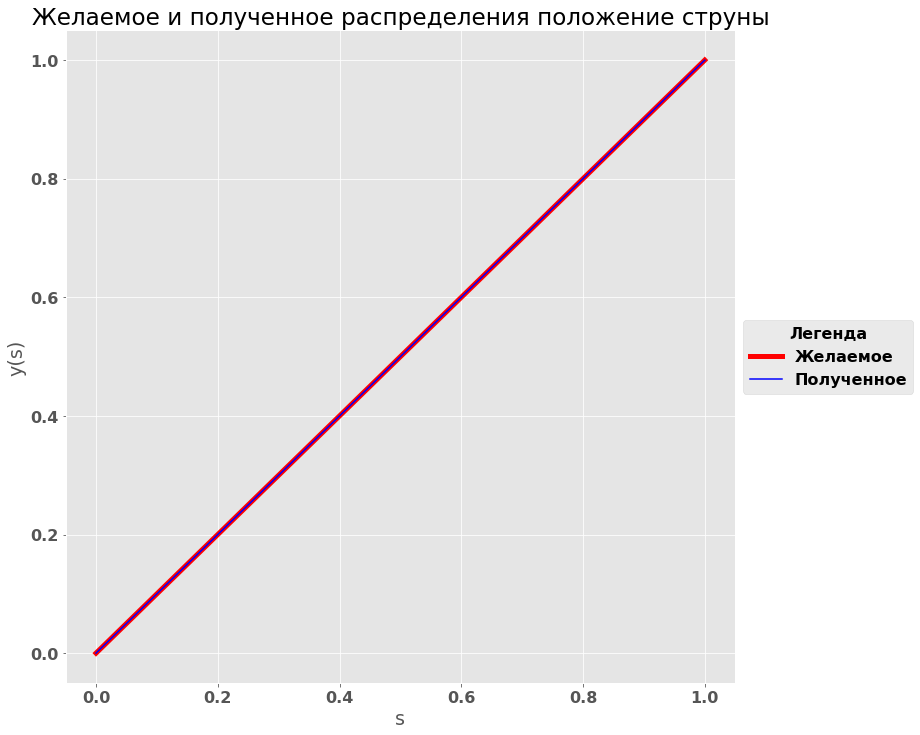

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', linewidth=5., label='Желаемое')
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Полученное')
#ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Желаемое и полученное распределения положение струны')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# График изменения ошибки

(3.8037519045764272e-09, 0.10000000380375192)

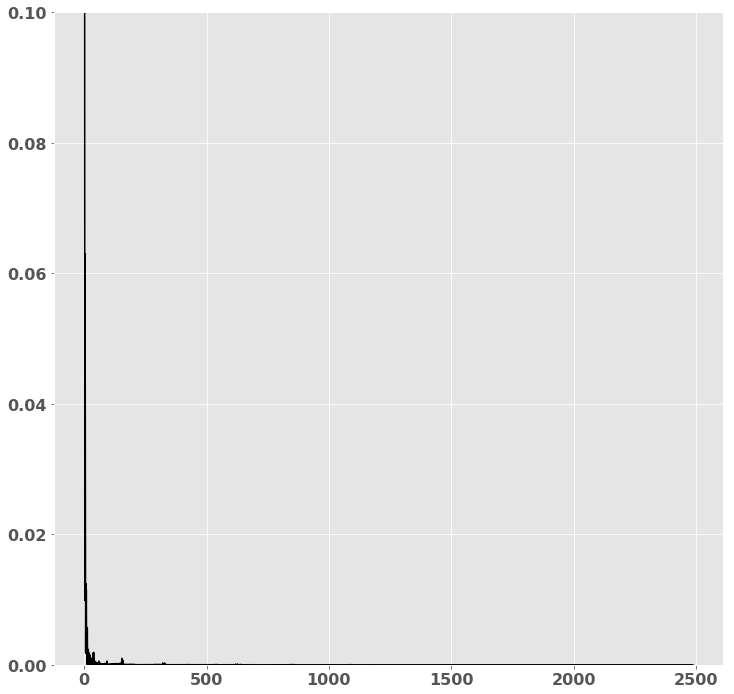

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(model.err, color='black', label='Ошибка')
ax.set_ylim([min(model.err), min(model.err) + .1])

---
# Управление

In [15]:
X_ = np.arange(0., p_d['l'] + p_d['dh'] / 4., p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'] / 4., p_d['dt'])
X_, Y_ = np.meshgrid(X_, Y_)
print(np.shape(X_), np.shape(Y_))

(41, 41) (41, 41)


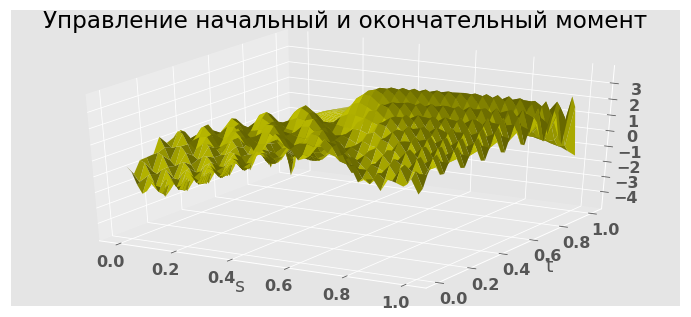

In [16]:
Z = model.f_arr[-1]

fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.plot_surface(X_, Y_, Z, color='y')
plt.xlabel('s')
plt.ylabel('t')
plt.title('Управление начальный и окончательный момент')
plt.show()

---
# Решение второстепенной задачи

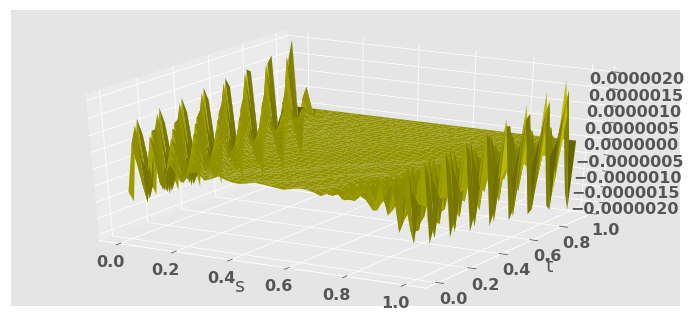

In [17]:
Z = model.psi_arr[-1]

fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.plot_surface(X_, Y_, Z, color='y')
plt.xlabel('s')
plt.ylabel('t')

plt.show()